In [1]:
import os
import numpy as np
from utils_notebook import get_MI_df, get_ranked_df, LATEX_FIG_PATH, get_DTI_rank_df
import matplotlib.pyplot as plt
import seaborn as sns


2024-05-08 17:59:46,892 - main - INFO - Logger is set.


# Downstream Eval

In [2]:
DATASET = "ZINC"
results_dir_list = ["run_4"]
COLUMS_SPLIT = "cond_modes"


df = get_MI_df(DATASET, results_dir_list)

#clear cell outputs
from IPython.display import clear_output


def process_dataset_name(dataset):
    return dataset.replace(
            "CarbonMangels", "Carb."
        ).replace(
            "Substrate", "Sub."
        ).replace(
            "_AstraZeneca",
            ""
        ).replace(
            "_AZ",
            ""
        ).replace(
            "HydrationFreeEnergy_",
            ""
        ).replace(
            "__",
            " "
        ).replace(
            "_",
            " "
        ).replace(
            "Clearance",
            "Clear."
        ).replace(
        "NCATS",
        ""
    ).replace(
        "Lagunin",
        ""
    ).replace(
        "Broccatelli",
        ""
    ).replace(
        "Ma",
        ""
    ).replace(
        "Hou",
        ""
    )

def prerpocess_emb_name(x):
    return x.replace(
        "DenoisingPretrainingPQCMv4",
        "3D-denoising"
    ).replace(
        "Chem",
        ""
    ).replace(
        "ThreeDInfomax",
        "3D-Infomax"
    ).replace(
        "_OGB",
        ""
    )

100%|██████████| 1/1 [00:00<00:00, 21.06it/s]


In [3]:
df_downs = get_ranked_df(df, path="results/TDC_ADMET_SCAFF.csv")
clear_output()
df_piv_mean = df_downs.groupby(["dataset"]).metric.mean()
df_piv_std = df_downs.groupby(["dataset"]).metric.std()
df_piv_min = df_downs.groupby(["dataset"]).metric.min()
df_piv_max = df_downs.groupby(["dataset"]).metric.max()


In [4]:
df_piv =  df_downs.copy().groupby(["dataset", "embedder", "run_id"]).metric.mean().to_frame()

In [19]:
(df_piv["metric"] - df_piv_mean)

dataset     embedder       run_id
AMES        AttributeMask  0        -0.063542
                           1        -0.039043
                           2        -0.064863
                           3        -0.026669
                           4        -0.020734
                                       ...   
hERG_Karim  ThreeDInfomax  5         0.007240
                           6         0.033476
                           7         0.046522
                           8         0.053463
                           9         0.027734
Name: metric, Length: 8680, dtype: float64

In [20]:

df_piv["metric - mu"] = (df_piv["metric"] - df_piv_mean)
df_piv["(metric - mu/sigma"] = (df_piv["metric"] - df_piv_mean) / df_piv_std
df_piv["metric normalized"] = (df_piv["metric"] - df_piv_min) / (df_piv_max - df_piv_min)
df_piv = df_piv.reset_index()

df_piv["dataset_id"] = df_piv["dataset"] + df_piv["run_id"].apply(str)


In [21]:
df_piv

,dataset,embedder,run_id,metric,metric - mu,(metric - mu/sigma,metric normalized,dataset_id
0,AMES,AttributeMask,0,0.756426,-0.063542,-1.692775,0.248868,AMES0
1,AMES,AttributeMask,1,0.780925,-0.039043,-1.040107,0.367281,AMES1
2,AMES,AttributeMask,2,0.755104,-0.064863,-1.727977,0.242481,AMES2
3,AMES,AttributeMask,3,0.793298,-0.026669,-0.710475,0.427086,AMES3
4,AMES,AttributeMask,4,0.799233,-0.020734,-0.552370,0.455771,AMES4
...,...,...,...,...,...,...,...,...
8675,hERG_Karim,ThreeDInfomax,5,0.810158,0.007240,0.183596,0.618124,hERG_Karim5
8676,hERG_Karim,ThreeDInfomax,6,0.836393,0.033476,0.848886,0.757161,hERG_Karim6
8677,hERG_Karim,ThreeDInfomax,7,0.849439,0.046522,1.179709,0.826298,hERG_Karim7
8678,hERG_Karim,ThreeDInfomax,8,0.856381,0.053463,1.355739,0.863086,hERG_Karim8


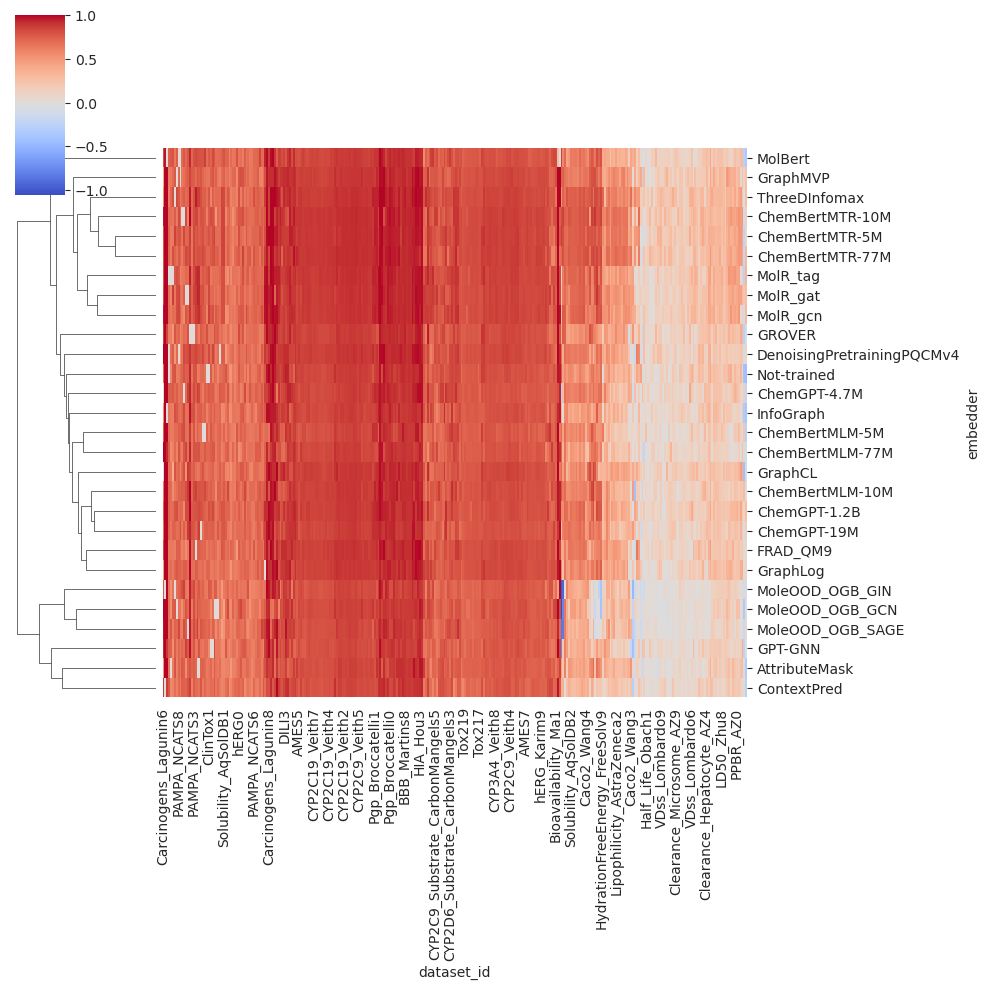

In [22]:
g = sns.clustermap(
    df_piv.pivot_table(index="embedder", columns="dataset_id", values="metric"),
    cmap="coolwarm",
    figsize=(10,10)
)

#remove row dendogran
g.ax_col_dendrogram.set_visible(False)

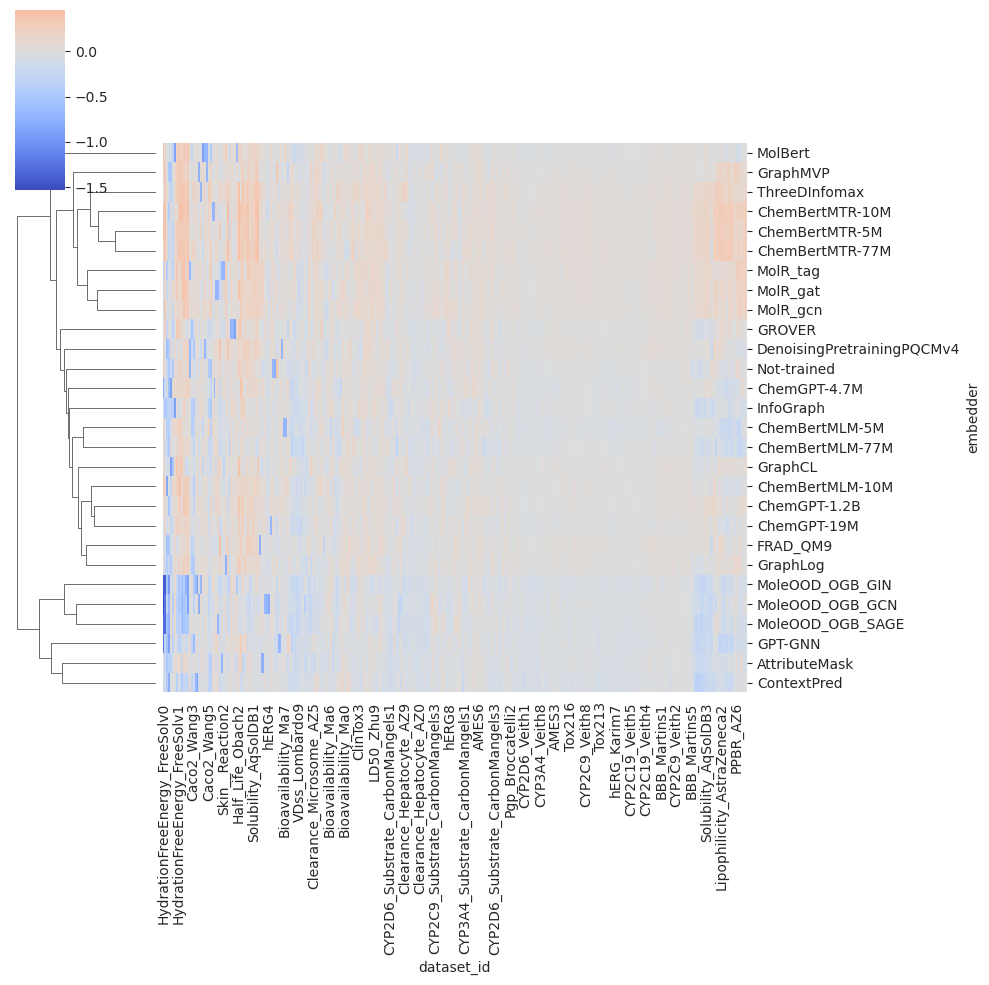

In [24]:
g = sns.clustermap(
    df_piv.pivot_table(index="embedder", columns="dataset_id", values="metric - mu"),
    cmap="coolwarm",
    figsize=(10,10),
    center = 0
)

#remove row dendogran
g.ax_col_dendrogram.set_visible(False)

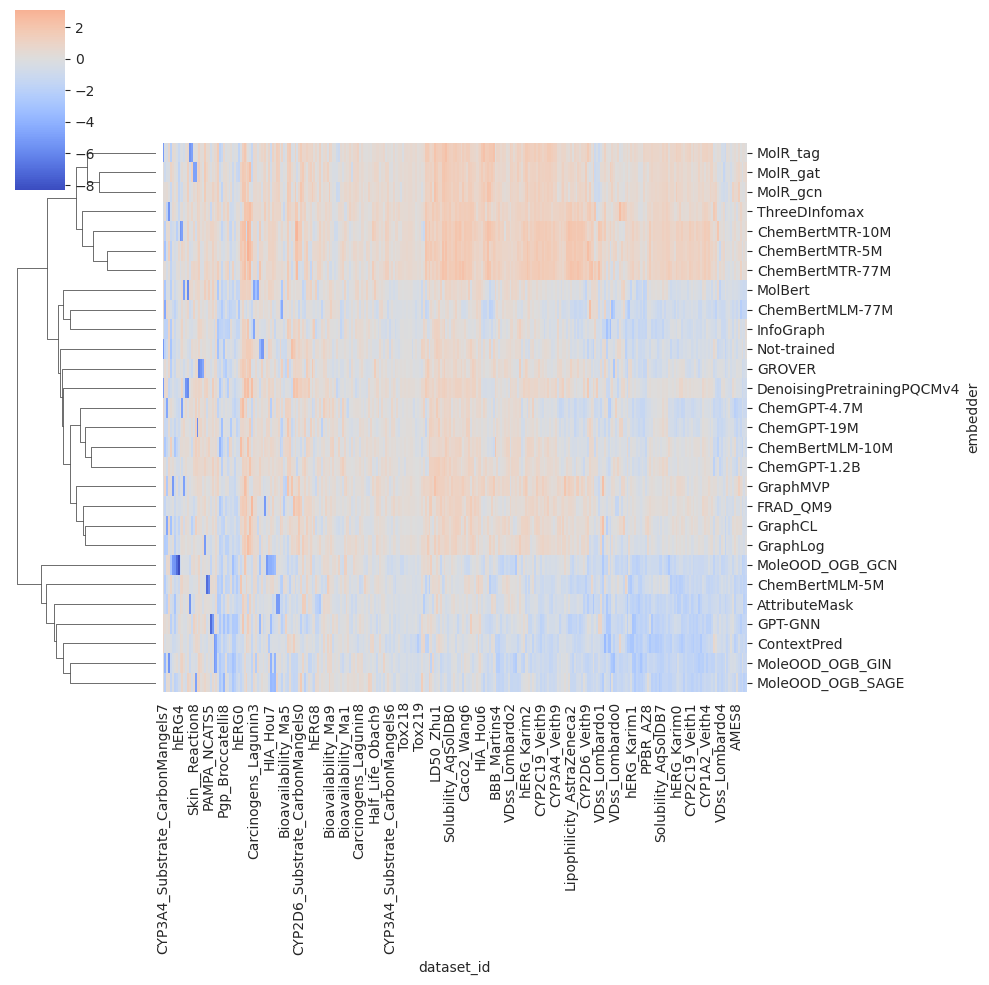

In [26]:
g = sns.clustermap(
    df_piv.pivot_table(index="embedder", columns="dataset_id", values="(metric - mu/sigma"),
    cmap="coolwarm",
    figsize=(10,10),
    center = 0
)

#remove row dendogran
g.ax_col_dendrogram.set_visible(False)

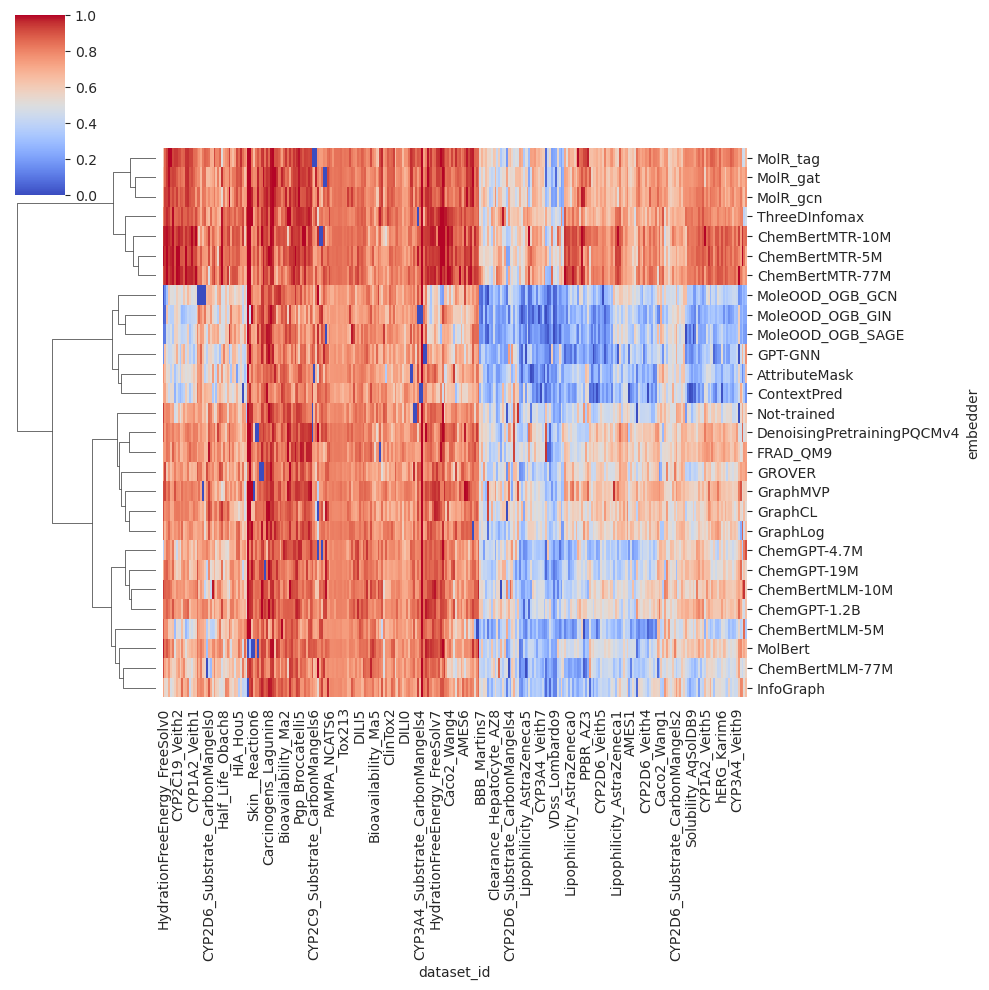

In [29]:
g = sns.clustermap(
    df_piv.pivot_table(index="embedder", columns="dataset_id", values="metric normalized"),
    cmap="coolwarm",
    figsize=(10,10),
    center = 0.5,
    method="ward"
)

#remove row dendogran
g.ax_col_dendrogram.set_visible(False)

/tmp/ipykernel_845716/17621617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)
/tmp/ipykernel_845716/17621617.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = df_tmp.groupby("embedder").median()
/tmp/ipykernel_845716/17621617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

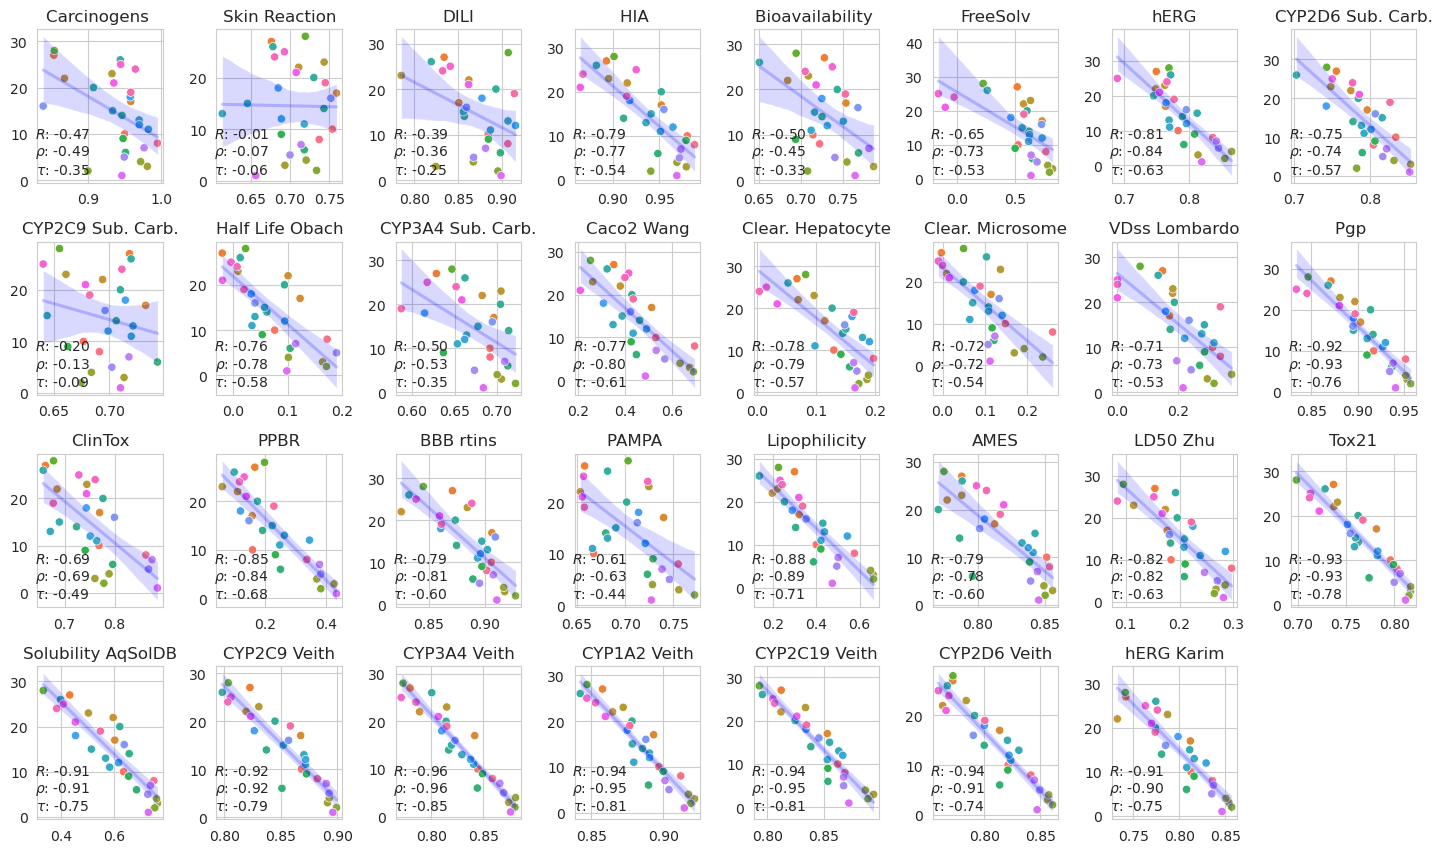

In [13]:
%matplotlib inline
n_rows = 4
n_cols = int(np.ceil(df_downs.dataset.nunique() / n_rows))



FIGSIZE = 1.8
fig, axes = plt.subplots(n_rows,n_cols, figsize=(FIGSIZE*n_cols,FIGSIZE*n_rows*1.2))
axes = axes.flatten()


for i,dataset in enumerate(df_downs.sort_values("task_size").dataset.unique()):
    df_tmp = df_downs[(df_downs.dataset == dataset)]
    df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)
    # compute ranking for roc
    df_tmp = df_tmp.groupby("embedder").median()
    sns.scatterplot(data=df_tmp, x="metric", y="meanrank_information", hue="embedder", ax=axes[i], legend=False)
    # add linear regression
    sns.regplot(data=df_tmp, x="metric", y="meanrank_information", ax=axes[i], scatter=False, color="blue", line_kws = {"alpha":0.2})
    axes[i].set_title(
            process_dataset_name(dataset)
    )
    # Remove the x and y axis labels
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    # Remove the xticks
    #axes[i].set_xticks([])
    #axes[i].set_yticks([])
    pearson = df_tmp[["metric","meanrank_information"]].corr("pearson").iloc[0,1]
    corr = df_tmp[["metric","meanrank_information"]].corr("spearman").iloc[0,1]
    corr_kendall = df_tmp[["metric","meanrank_information"]].corr("kendall").iloc[0,1]

    axes[i].text(0.2, 0.2, f"$R$: {pearson:.2f}\n" +  r"$\rho$: " +  f"{corr:.2f}\n" +r"$\tau $: "+f"{corr_kendall:.2f}", horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

# Remove the empty subplots
for i in range(len(df_downs.dataset.unique()), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()




plt.savefig(f"{LATEX_FIG_PATH}/molecule/all_TDC_results_scaff.pdf", format = "pdf", bbox_inches = 'tight')

In [42]:
Association = {
    "LLM" : [
    "MolBert",
    "ChemBertMLM-5M",
    "ChemBertMLM-10M",
    "ChemBertMLM-77M",
    "ChemGPT-1.2B",
    "ChemGPT-19M",
    "ChemGPT-4.7M",
],
    "LLM-Property" : [
    "ChemBertMTR-5M",
    "ChemBertMTR-10M",
    "ChemBertMTR-77M",],
"3D" : ["DenoisingPretrainingPQCMv4",
        "FRAD_QM9",],
"MolR": [
        "MolR_gat",
        "MolR_gcn",
        "MolR_tag",
    ],

"2D-3D": [
        "ThreeDInfomax","GraphMVP"
    ],
"MoleOOD": [
        "MoleOOD_OGB_GIN",
        "MoleOOD_OGB_GCN",
        "MoleOOD_OGB_SAGE",
    ],
"GNN_std": [
        "ContextPred",
        "AttributeMask",
        "Not-trained",
    ],
"Others" : [
        "GPT-GNN",
        "GROVER",
        "GraphLog",
        "GraphCL",
        "InfoGraph",
    ]
}
df_downs = get_ranked_df(df, path="results/TDC_ADMET_SCAFF.csv")
df_downs["Group"] = df_downs.embedder.apply(lambda x: [k for k,v in Association.items() if x in v][0])
df_tmp = df_downs
df_tmp = df_tmp.groupby(["embedder", "Group"]).mean()
clear_output()

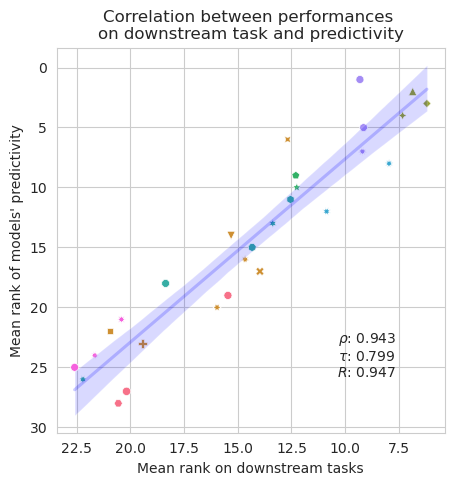

In [43]:

%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(5,5))


sns.scatterplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", hue="Group", ax=ax, legend=False, palette="husl", style="embedder")
sns.regplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", ax=ax, scatter=False, color="blue", line_kws = {"alpha":0.2})

# Display the correlation coefficient
pearson = df_tmp[["global_meanrank_metric","meanrank_information"]].corr("pearson").iloc[0,1]
corr = df_tmp[["global_meanrank_metric","meanrank_information"]].corr("spearman").iloc[0,1]
corr_kendall = df_tmp[["global_meanrank_metric", "meanrank_information"]].corr("kendall").iloc[0,1]
ax.text(0.8, 0.2, r"$\rho$: " +  f"{corr:.2f}\n"+r"$\tau $: "+f"{corr_kendall:.2f}" + f"\n$R$: {pearson:.2f}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title(f"")
ax.set_ylabel("Mean rank of models' predictivity")
ax.set_xlabel("Mean rank on downstream tasks")

# Invert x and y axis
ax.invert_xaxis()
ax.invert_yaxis()


plt.title("Correlation between performances \non downstream task and predictivity")

plt.savefig(f"{LATEX_FIG_PATH}/molecule/meanrank_scaff.pdf", format = "pdf", bbox_inches = 'tight')

In [44]:
df = get_MI_df("ZINC", ["run_4"])
df_downs = get_ranked_df(df, split_on="task_type", path="results/TDC_ADMET_SCAFF.csv")
df_downs_glob = get_ranked_df(df, path="results/TDC_ADMET_SCAFF.csv")
clear_output()

In [45]:
df_plot_task = df_downs.groupby(["embedder", "task_type"]).mean().reset_index().pivot_table(index="embedder", columns="task_type", values="global_meanrank_metric")

df_plot_task.columns.name = None

df_plot_glob = df_downs_glob.groupby("embedder").mean()[["global_meanrank_metric", "meanrank_information"]]
clear_output()
df_plot_task

,Classification,Regression
embedder,,
AttributeMask,21.4250,17.900000
ChemBertMLM-10M,13.2175,15.327273
ChemBertMLM-5M,21.2350,20.400000
ChemBertMLM-77M,19.5350,19.254545
ChemBertMTR-10M,6.3075,5.990909
ChemBertMTR-5M,6.7350,8.409091
ChemBertMTR-77M,6.4375,7.618182
ChemGPT-1.2B,12.2375,13.472727
ChemGPT-19M,15.7875,14.436364


In [46]:
df_plot = df_plot_task.join(df_plot_glob)
METRIC = r"$\overline{I_\mathcal{V}}}$"
avg_results = df_plot.reset_index().rename(
    columns={
        "global_meanrank_metric": "ADMET",
        "meanrank_information": METRIC,
        "Classification": "Classification (20 tasks)",
        "Regression": "Regression (11 tasks)",
        "embedder": "model"
    }
)
avg_results.model = avg_results.model.apply(prerpocess_emb_name)

In [181]:
# make mosaic map
%matplotlib inline

def plot_glob_mosaic(avg_results, METRIC=METRIC, MODEL_TO_ANNOATE = set(["3D-Infomax", "InfoGraph", "MolBert", "BertMTR-5M", "GraphCL", "Not-trained"]), MODEL_TO_ANNOATE_left = set(), FIGSIZE=5):
    mosaic_map = [
        ['A', 'B'],
        ['A', 'C'],
      ]

    mosaic_to_task_map = {
        'A': 'ADMET',
        'B': "Classification (20 tasks)",
        'C': "Regression (11 tasks)",
    }

    mosaic_map = np.array(mosaic_map)
    mosaic_map = np.vectorize(lambda x: mosaic_to_task_map[x])(mosaic_map)


    fig, ax = plt.subplot_mosaic(mosaic_map, figsize=(FIGSIZE, FIGSIZE*3/4), gridspec_kw={"width_ratios": [1/2, 1/5]})
    METRICS = mosaic_to_task_map.values()
    for i, metric in enumerate(METRICS):
        if metric == "ADMET":
            s = 100
        else:
            s = 50
        ax[metric] = sns.regplot(data=avg_results, y=METRIC, x=metric, ax=ax[metric], scatter=False)
        ax[metric] = sns.scatterplot(data=avg_results, y=METRIC, x=metric, ax=ax[metric], legend=False, hue = 'model', style='model', s=s)


        # annotate model names
        if metric == 'ADMET':
            for i, row in avg_results.iterrows():
                xy = (row[metric], row[METRIC])
                if row['model'] in MODEL_TO_ANNOATE:
                    xytext = (9.5,-9.5)
                    ax[metric].annotate(
                        row['model'],
                        xy,
                        fontsize=10,
                        va='center',
                        ha='left',
                        textcoords='offset points',
                        xytext=xytext,
                        arrowprops=dict(
                            facecolor='black',
                            color='black',
                            arrowstyle='->',
                            connectionstyle='arc3,rad=0.2'
                        )
                    )
                elif row["model"] in MODEL_TO_ANNOATE_left:
                    xytext = (-65.5,10.5)
                    ax[metric].annotate(
                        row['model'],
                        xy,
                        fontsize=10,
                        va='center',
                        ha='left',
                        textcoords='offset points',
                        xytext=xytext,
                        arrowprops=dict(
                            facecolor='black',
                            color='black',
                            arrowstyle='->',
                            connectionstyle='arc3,rad=0.2'
                        )
                    )

        # annotate correllation
        corr = avg_results[[METRIC, metric]].corr(method="spearman").iloc[0, 1]
        kendall = avg_results[[METRIC, metric]].corr(method="kendall").iloc[0, 1]
        pearson = avg_results[[METRIC, metric]].corr(method="pearson").iloc[0, 1]
        if metric != 'ADMET':
            ax[metric].annotate(
                r"$\rho_p$" + f": {pearson:.2f}\n" + r"$\rho_s$" + f": {corr:.2f}\n" + r" $\tau$" + f": {kendall:.2f}",
                (0.55, 0.05),
                xycoords='axes fraction',
                fontsize=8,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
            )
        else:
            ax[metric].annotate(
                r"$\rho_p$" + f": {pearson:.2f}\n" + r"$\rho_s$" + f": {corr:.2f}\n" + r" $\tau$" + f": {kendall:.2f}",
                (0.75, 0.1),
                xycoords='axes fraction',
                fontsize=12,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
            )

        if metric == 'ADMET':
            ax[metric].set_title(metric, fontweight='bold')
            ax[metric].set_ylabel(METRIC + "  " + r"$(rank\downarrow)$")
            ax[metric].set_xlabel('Downstream tasks  $(rank\downarrow)$')
            ax[metric].set_xlim(5.5,22.7)
        else:
            ax[metric].set_title(metric.replace('Average', '').replace("(", "\n("), fontsize=10,)
            ax[metric].set_xlabel('')
            ax[metric].set_ylabel('')
            ax[metric].set_xticks([])
            ax[metric].set_yticks([])


    fig.tight_layout()

    plt.savefig(f"{LATEX_FIG_PATH}/molecule/meanrank_task_size_allfig_scaff.pdf", format = "pdf", bbox_inches = 'tight')


/tmp/ipykernel_714919/2632602120.py:54: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[metric].annotate(
/tmp/ipykernel_714919/2632602120.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[metric].annotate(


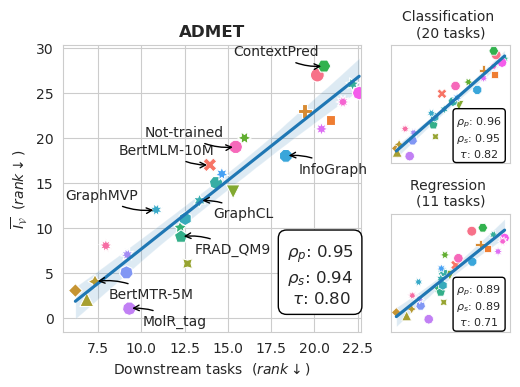

In [182]:
plot_glob_mosaic(
    avg_results,
    METRIC=METRIC,
    FIGSIZE=5.3,
    MODEL_TO_ANNOATE = set([
        "MolR_tag", "FRAD_QM9", "BertMTR-5M", "InfoGraph", "GraphCL",
    ]),
    MODEL_TO_ANNOATE_left = set(["Not-trained", "ContextPred", "GraphMVP", "BertMLM-10M"])
)

/tmp/ipykernel_714919/20845665.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = df_downs[df_downs.task_category == task_category].groupby("embedder").mean()
/tmp/ipykernel_714919/20845665.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = df_downs[df_downs.task_category == task_category].groupby("embedder").mean()
/tmp/ipykernel_714919/20845665.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  

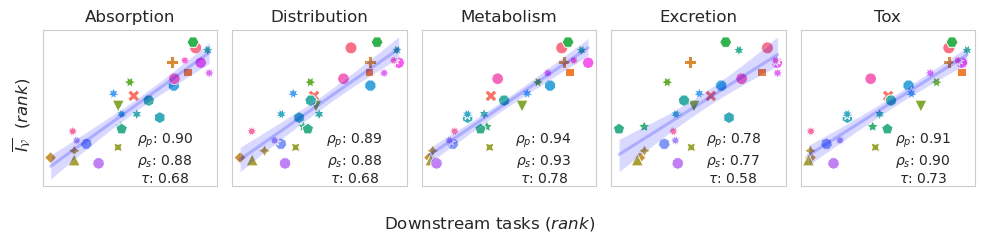

In [183]:
#same fig by separating on task_type
%matplotlib inline
df_downs = get_ranked_df(df, split_on="task_category", path="results/TDC_ADMET_SCAFF.csv")
FIGSIZE = 2
clear_output()
fig,axes = plt.subplots(1,df_downs.task_category.nunique(), figsize=(FIGSIZE*df_downs.task_category.nunique(),FIGSIZE*1.2), sharey=True, )

for i,task_category in enumerate(["Absorption", "Distribution", "Metabolism", "Excretion", "Tox"]):
    df_tmp = df_downs[df_downs.task_category == task_category].groupby("embedder").mean()
    sns.scatterplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", hue="embedder", ax=axes[i], legend=False, style="embedder", s=75)
    sns.regplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", ax=axes[i], scatter=False, color="blue", line_kws = {"alpha":0.2})

    # Display the correlation coefficient
    pearson = df_tmp[["global_meanrank_metric","meanrank_information"]].corr("pearson").iloc[0,1]
    corr = df_tmp[["global_meanrank_metric","meanrank_information"]].corr("spearman").iloc[0,1]
    kendall = df_tmp[["global_meanrank_metric","meanrank_information"]].corr("kendall").iloc[0,1]
    axes[i].text(
        0.7,
        0.18,
        r"$\rho_p$: " +  f"{pearson:.2f}\n" + r"$\rho_s$: " +  f"{corr:.2f}\n"+r"$\tau $: "+f"{kendall:.2f}",
        horizontalalignment='center',
        verticalalignment='center',
        transform=axes[i].transAxes
    )

    axes[i].set_title(f"{task_category}")
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.supxlabel(f"Downstream tasks $(rank)$")
fig.supylabel(f"{METRIC}  $(rank)$",)

fig.tight_layout()
plt.savefig(f"{LATEX_FIG_PATH}/molecule/meanrank_task_category_scaff.pdf", format = "pdf", bbox_inches = 'tight')

In [52]:

df_downs = get_ranked_df(df, path="results/TDC_ADMET_SCAFF.csv")
df_downs

/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


,embedder,dataset,length,metric_test,metric,run_id,information,cond_modes,task_category,task_type,task_size,task_size_bin,meanrank_information,meanrank_metric,global_meanrank_metric
0,ContextPred,HIA_Hou,1024,0.830870,0.911854,0,0.347952,4,Absorption,Classification,578,small,28.0,21.5,20.558065
28,ContextPred,HIA_Hou,1024,0.775000,0.867347,1,0.347952,4,Absorption,Classification,578,small,28.0,21.5,20.558065
56,ContextPred,HIA_Hou,1024,0.687285,0.901163,2,0.347952,4,Absorption,Classification,578,small,28.0,21.5,20.558065
84,ContextPred,HIA_Hou,1024,0.833333,0.911364,3,0.347952,4,Absorption,Classification,578,small,28.0,21.5,20.558065
112,ContextPred,HIA_Hou,1024,0.772789,0.906915,4,0.347952,4,Absorption,Classification,578,small,28.0,21.5,20.558065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,ThreeDInfomax,Half_Life_Obach,1024,-1.737133,0.169500,5,0.868448,4,Excretion,Regression,667,small,8.0,12.5,7.956452
11675,ThreeDInfomax,Half_Life_Obach,1024,0.357613,0.217582,6,0.868448,4,Excretion,Regression,667,small,8.0,12.5,7.956452
11703,ThreeDInfomax,Half_Life_Obach,1024,0.022513,0.175947,7,0.868448,4,Excretion,Regression,667,small,8.0,12.5,7.956452
11731,ThreeDInfomax,Half_Life_Obach,1024,-0.622506,0.355016,8,0.868448,4,Excretion,Regression,667,small,8.0,12.5,7.956452


In [53]:
df = get_MI_df("ZINC", ["run_4"])

100%|██████████| 1/1 [00:00<00:00, 25.38it/s]


/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/3488925372.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data=df_plot.groupby("embedder").mean().sort_values("

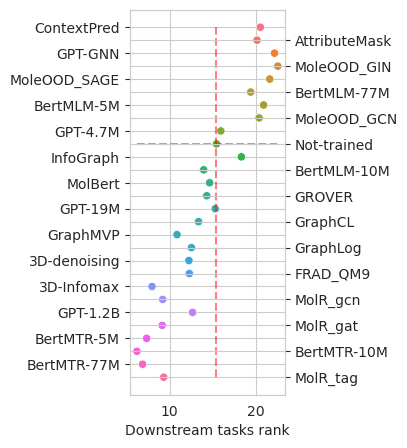

In [54]:
%matplotlib inline

fig, ax= plt.subplots(1,1,figsize=(2,5))

df_plot = get_ranked_df(df, path="results/TDC_ADMET_SCAFF.csv")
df_plot["embedder"] = df_plot.embedder.apply(prerpocess_emb_name)
sns.scatterplot(data=df_plot.groupby("embedder").mean().sort_values("information"), y="embedder", x="global_meanrank_metric", hue="embedder", legend=False,)

corr = df_plot[["global_meanrank_metric", "meanrank_information"]].corr().iloc[0,1]
kendall = df_plot[["global_meanrank_metric", "meanrank_information"]].corr("kendall").iloc[0,1]
#plt.text(0.85, 0.15, r"$\rho$: " +  f"{corr:.2f}\n"+r"$\tau $: "+f"{kendall:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
ticks = df_plot.groupby("embedder").mean().sort_values("information").index

ax.vlines(df_plot[df_plot.embedder == "Not-trained"].global_meanrank_metric.iloc[0], 0, len(ticks)-1, color="r", linestyle="--", alpha = 0.5)
ax.hlines(df_plot[df_plot.embedder == "Not-trained"].embedder.iloc[0], df_plot.global_meanrank_metric.min(), df_plot.global_meanrank_metric.max(), color="r", linestyle="--", alpha = .5)

plt.xlabel("Downstream tasks rank")
plt.ylabel("")
#Put one y tick out of two on each side of the plot
y2 = ax.twinx()
y2.set_yticks(ax.get_yticks())
y2.set_yticklabels(ticks)
y2.set_yticks(ax.get_yticks()[1::2])
y2.set_ylim(ax.get_ylim())


ax.set_yticks(ax.get_yticks()[::2])


#plt.yticks(rotation=90)
plt.savefig(f"{LATEX_FIG_PATH}/molecule/mearnak_detailed_global_scaff.pdf", format = "pdf", bbox_inches = 'tight')

In [55]:
Xs = [
    [
        "ChemBertMLM-10M",
        "ChemBertMLM-5M",
        "ChemBertMLM-77M",
    ],
    [
        "ChemBertMTR-77M",
        "ChemBertMTR-10M",
        "ChemBertMTR-5M",
    ],
    [
        "DenoisingPretrainingPQCMv4",
        "FRAD_QM9",
    ],
    [
        "MolR_tag",
        "MolR_gcn",
        "MolR_gat",
    ],
    [
        "MoleOOD_OGB_GCN",
        "MoleOOD_OGB_SAGE",
        "MoleOOD_OGB_GIN",
    ],
]

for xs in Xs:
    for i in range(0, len(xs)):
        xs[i] = prerpocess_emb_name(xs[i])
print(Xs)
print("--------------")
names = [
    "ChemBert-MLM",
    "ChemBert-MTR",
    "3D",
    "MolR",
    "MoleOOD",
]

hue_orders = {name:xs for name,xs in zip(names,Xs)}

df_downs = get_ranked_df(df)
df_downs.embedder = df_downs.embedder.apply(prerpocess_emb_name)
df_downs["models_group"] = np.nan
for i, xs in enumerate(Xs):
    print(xs)
    df_downs.loc[df_downs.embedder.isin(xs), "models_group"] = names[i]
print(df_downs.embedder.unique())
df_downs = df_downs.dropna()
print(df_downs.embedder.unique())
df_downs

[['BertMLM-10M', 'BertMLM-5M', 'BertMLM-77M'], ['BertMTR-77M', 'BertMTR-10M', 'BertMTR-5M'], ['3D-denoising', 'FRAD_QM9'], ['MolR_tag', 'MolR_gcn', 'MolR_gat'], ['MoleOOD_GCN', 'MoleOOD_SAGE', 'MoleOOD_GIN']]
--------------


/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


,embedder,dataset,length,metric_test,metric,run_id,information,cond_modes,task_category,task_type,task_size,task_size_bin,meanrank_information,meanrank_metric,global_meanrank_metric,models_group
10,BertMLM-5M,LD50_Zhu,1024,0.360520,0.381504,0,0.473562,4,Tox,Regression,7385,large,22.0,23.7,21.350000,ChemBert-MLM
38,BertMLM-5M,LD50_Zhu,1024,0.297023,0.461515,1,0.473562,4,Tox,Regression,7385,large,22.0,23.7,21.350000,ChemBert-MLM
66,BertMLM-5M,LD50_Zhu,1024,0.414559,0.374875,2,0.473562,4,Tox,Regression,7385,large,22.0,23.7,21.350000,ChemBert-MLM
94,BertMLM-5M,LD50_Zhu,1024,0.331038,0.401968,3,0.473562,4,Tox,Regression,7385,large,22.0,23.7,21.350000,ChemBert-MLM
122,BertMLM-5M,LD50_Zhu,1024,0.292888,0.433888,4,0.473562,4,Tox,Regression,7385,large,22.0,23.7,21.350000,ChemBert-MLM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,MoleOOD_SAGE,hERG_Karim,1024,0.802545,0.831968,5,0.430292,4,Tox,Classification,13445,large,24.0,26.2,21.182258,MoleOOD
11674,MoleOOD_SAGE,hERG_Karim,1024,0.819010,0.840717,6,0.430292,4,Tox,Classification,13445,large,24.0,26.2,21.182258,MoleOOD
11702,MoleOOD_SAGE,hERG_Karim,1024,0.801236,0.832633,7,0.430292,4,Tox,Classification,13445,large,24.0,26.2,21.182258,MoleOOD
11730,MoleOOD_SAGE,hERG_Karim,1024,0.805258,0.820751,8,0.430292,4,Tox,Classification,13445,large,24.0,26.2,21.182258,MoleOOD


/tmp/ipykernel_714919/3685189186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)
/tmp/ipykernel_714919/3685189186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)
/tmp/ipykernel_714919/3685189186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

['BertMLM-5M' 'BertMLM-10M' 'BertMLM-77M']
['BertMTR-5M' 'BertMTR-10M' 'BertMTR-77M']
['3D-denoising' 'FRAD_QM9']
['MolR_gat' 'MolR_gcn' 'MolR_tag']


/tmp/ipykernel_714919/3685189186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)


['MoleOOD_GIN' 'MoleOOD_GCN' 'MoleOOD_SAGE']


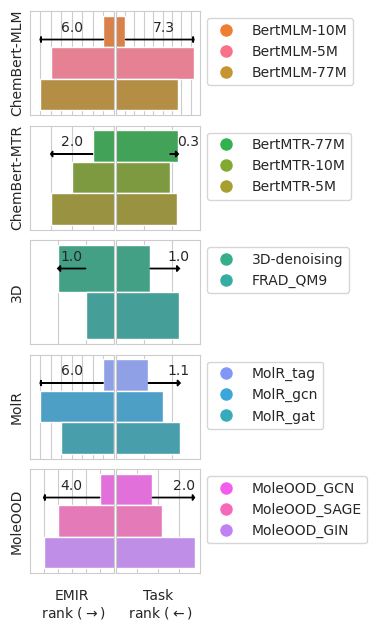

In [56]:
fig,axes = plt.subplots(df_downs.models_group.nunique(),2, figsize=(2.2,7.3))
cmap = sns.color_palette("husl", n_colors=df_downs.embedder.nunique())
cmap = {embedder:color for embedder,color in zip(df_downs.embedder.unique(),cmap)}

lim_low = 0.7
lim_high = 1.05

for i,name in enumerate(names):
    df_tmp = df_downs[df_downs.models_group == name]
    df_tmp.embedder = df_tmp.embedder.apply(prerpocess_emb_name)

    min_rank_downs = df_tmp.global_meanrank_metric.max()
    max_rank_downs = df_tmp.global_meanrank_metric.min()
    diff_rank_downs = max_rank_downs - min_rank_downs
    min_rank_info = df_tmp.meanrank_information.max()
    max_rank_info = df_tmp.meanrank_information.min()
    diff_rank_info = max_rank_info - min_rank_info

    #Barplot of the downstream task
    print(df_tmp.embedder.unique())
    sns.barplot(data=df_tmp, x="global_meanrank_metric", y="models_group", hue="embedder", ax=axes[i,1], dodge=True, palette=cmap, legend=False, hue_order=hue_orders[name], errorbar=None)
    #remove y label and yticks
    axes[i,1].set_ylabel("")
    axes[i,1].set_yticks([])
    min_val = int(df_tmp["global_meanrank_metric"].min() - 1)
    max_val = int(df_tmp["global_meanrank_metric"].max() + 1)

    axes[i,1].set_xticks(list(range(min_val, max_val)))
    axes[i,1].set_xticklabels([])
    axes[i,1].set_xlabel("")
    axes[i,1].set_xlim(min_val, max_val)
    #Add arrow from lowest barplot to highest labeled with the difference
    axes[i,1].arrow(
        max_rank_downs,
        -0.2,
        -diff_rank_downs,
        0,
        head_width=0.05,
        head_length=0.1,
        length_includes_head=True,
        shape="full",
        color="black",
    )
    axes[i,1].text(
        (max_rank_downs + min_rank_downs) / 2 +0.5,
        -0.3,
        f"{-diff_rank_downs:.1f}",
        horizontalalignment='center',
        verticalalignment='center',
    )

    #Barplot of the predictivity
    sns.barplot(data=df_tmp, x="meanrank_information", y="models_group", hue="embedder", ax=axes[i,0], dodge=True, palette=cmap, legend=False, hue_order=hue_orders[name], errorbar=None)


    axes[i,0].set_ylabel(name)
    #remove y label and yticks
    axes[i,0].set_yticks([])
    min_val = int(df_tmp["meanrank_information"].min() - 1)
    max_val = int(df_tmp["meanrank_information"].max() + 1)
    axes[i,0].set_xticks(list(range(min_val, max_val)))
    axes[i,0].set_xticklabels([])
    axes[i,0].set_xlabel("")
    #Invert x axis

    axes[i,0].set_xlim(min_val, max_val)
    axes[i,0].invert_xaxis()
    #Add arrow from lowest barplot to highest labeled with the difference
    axes[i,0].arrow(
        max_rank_info,
        -0.2,
        -diff_rank_info,
        0,
        head_width=0.05,
        head_length=0.1,
        length_includes_head=True,
        shape="full",
        color="black",
    )
    axes[i,0].text(
        (max_rank_info + min_rank_info) / 2 +0.0,
        -0.3,
        f"{-diff_rank_info:.1f}",
        horizontalalignment='center',
        verticalalignment='center',
    )






    #legend outside of the whole cmap with rounds
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=embedder, markerfacecolor=cmap[embedder], markersize=10) for embedder in hue_orders[name]]
    axes[i,1].legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left')

axes[-1,1].set_xlabel("Task\n rank "+r"($\leftarrow$)")
axes[-1,0].set_xlabel("EMIR\n rank "+r"($\rightarrow$)")
plt.subplots_adjust(wspace=0.02, hspace=0.1)

plt.savefig(f"{LATEX_FIG_PATH}/molecule/meanrank_models_group_vert.pdf", format = "pdf", bbox_inches = 'tight')

/tmp/ipykernel_195163/354828172.py:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


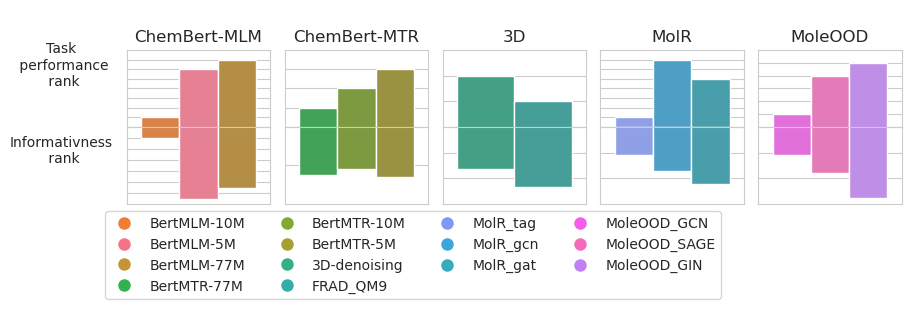

In [68]:
%matplotlib inline
fig,axes = plt.subplots(2,df_downs.models_group.nunique(), figsize=(10, 2))

cmap = sns.color_palette("husl", n_colors=df_downs.embedder.nunique())
cmap = {embedder:color for embedder,color in zip(df_downs.embedder.unique(),cmap)}



for i,name in enumerate(names):
    ax = axes[:,i]
    df_tmp = df_downs[df_downs.models_group == name]
    #Barplot of the downstream task
    sns.barplot(data=df_tmp, y="global_meanrank_metric", x="models_group", hue="embedder", ax=ax[1], dodge=True, palette=cmap, legend=False, hue_order=hue_orders[name], errorbar=None)
    #remove y label and yticks
    min_val = int(df_tmp["global_meanrank_metric"].min() - 1)
    max_val = int(df_tmp["global_meanrank_metric"].max() + 1)
    ax[1].set_yticks(list(range(min_val, max_val)))
    ax[1].set_yticklabels([])
    ax[1].set_xlabel("")
    ax[1].set_ylabel("")
    ax[1].set_ylim(min_val, max_val)
    ax[1].set_xticks([])

    #Barplot of the predictivity
    sns.barplot(data=df_tmp, y="meanrank_information", x="models_group", hue="embedder", ax=ax[0], dodge=True, palette=cmap, legend=False, hue_order=hue_orders[name], errorbar=None)
    ax[0].set_title(name)
    #remove y label and yticks
    ax[0].set_ylabel("")
    min_val = int(df_tmp["meanrank_information"].min() - 1)
    max_val = int(df_tmp["meanrank_information"].max() + 1)
    ax[0].set_yticks(list(range(min_val, max_val)))
    ax[0].set_yticklabels([])
    ax[0].set_xlabel("")
    ax[0].set_ylim(min_val, max_val)
    ax[0].set_xticks([])
    #Invert x axis

    ax[1].invert_yaxis()


#legend outside of the whole cmap with rounds
handles = [
    plt.Line2D(
        [0],
        [0],
        marker='o',
        color='w',
        label=embedder,
        markerfacecolor=cmap[embedder],
        markersize=10
    ) for h_o in hue_orders.values() for embedder in h_o ]
axes[0,1].legend(handles=handles, bbox_to_anchor=(-1.3, -1), loc='upper left', ncol=4)

axes[0,0].set_ylabel(" \n \nTask\n performance\n rank", rotation=0, labelpad=40)
axes[1,0].set_ylabel("Informativness\n rank", rotation=0, labelpad=40)
#Rotate y labels
axes[0,0].set_yticklabels(axes[0,0].get_xticklabels(), rotation=90)


plt.subplots_adjust(wspace=0.1, hspace=0.0)
fig.tight_layout()

plt.savefig(f"{LATEX_FIG_PATH}/molecule/meanrank_models_group.pdf", format = "pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
hue_orders

In [59]:
import pandas as pd
from utils_notebook import get_MI_df, get_ranked_df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm as tqd
# Compute and plot correlation graphs when selecting subsets of the models
COLUMS_SPLIT = "cond_modes"
N_MODELS = [3,5,10,15,20,27]
N_RUNS = 10
df = get_MI_df("ZINC", ["run_2"])
df_downs = get_ranked_df(df)

df_corr = pd.DataFrame(columns=["n_model", "kendall", "pearson"])
clear_output()
p_bar = tqd(total=len(N_MODELS)*N_RUNS)

for i,n_model in enumerate(N_MODELS):
    for j in range(N_RUNS):
        model_list = df.X.unique()
        new_model_list = np.random.choice(model_list, n_model, replace=False)
        df_downs = get_ranked_df(df[df.X.isin(new_model_list) & df.Y.isin(new_model_list)])
        corr = df_downs[["meanrank_metric", "meanrank_information"]].corr().iloc[0,1]
        kendall = df_downs[["meanrank_metric", "meanrank_information"]].corr("kendall").iloc[0,1]
        df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)

        p_bar.update(1)


  0%|          | 0/60 [00:00<?, ?it/s]

/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)
/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/tmp/ipykernel_714919/2607680125.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr = df_corr.append({"n_model":n_model, "kendall":kendall, "pearson":corr}, ignore_index=True)


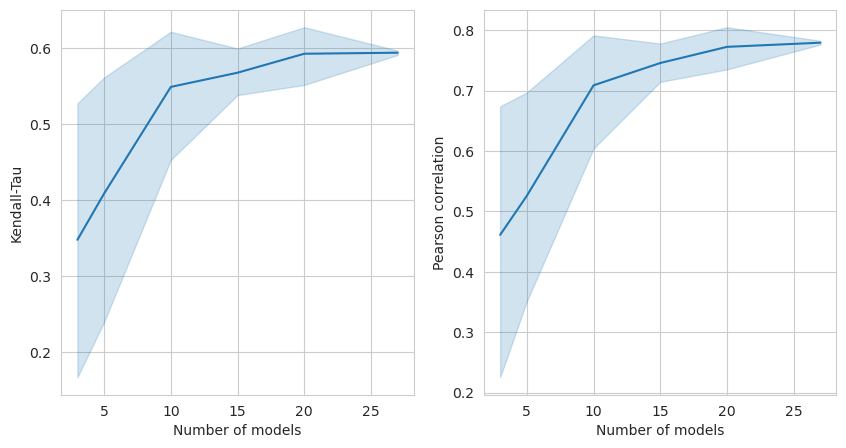

In [67]:
%matplotlib inline
fig,axes = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=df_corr, x="n_model", y="kendall", ax = axes[0])
axes[0].set_xlabel("Number of models")
axes[0].set_ylabel("Kendall-Tau")

sns.lineplot(data=df_corr, x="n_model", y="pearson", ax = axes[1])
axes[1].set_xlabel("Number of models")
axes[1].set_ylabel("Pearson correlation")



plt.savefig(f"{LATEX_FIG_PATH}/molecule/corr_kendall.pdf", format = "pdf", bbox_inches = 'tight')

In [ ]:
%matplotlib inline


DATASET = "ZINC"
results_dir_list = ["run_1", "run_2", "run_4", "run_8"]
COLUMS_SPLIT = "cond_modes"


df = get_MI_df(DATASET, results_dir_list)

fig, axes = plt.subplots(1,df_downs[COLUMS_SPLIT].nunique(), figsize=(5*df_downs[COLUMS_SPLIT].nunique(),5))

df_downs = get_ranked_df(df,COLUMS_SPLIT= COLUMS_SPLIT)

for i,ff_layers in enumerate(df_downs[COLUMS_SPLIT].unique()):
    df_tmp = df_downs[df_downs[COLUMS_SPLIT] == ff_layers]
    df_tmp = df_tmp.groupby("embedder").mean()
    sns.scatterplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", hue="embedder", ax=axes[i], legend=False)
    sns.regplot(data=df_tmp, x="global_meanrank_metric", y="meanrank_information", ax=axes[i], scatter=False, color="blue", line_kws = {"alpha":0.2})

    # Display the correlation coefficient
    corr = np.corrcoef(df_tmp["meanrank_metric"], df_tmp["meanrank_information"])[0,1]
    axes[i].text(0.3, 0.8, f"Correlation: {corr:.4f}", horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

    axes[i].set_title(f"{COLUMS_SPLIT}: {ff_layers}")
    axes[i].set_ylabel("Mean rank of models' predictivity")
    axes[i].set_xlabel("Mean rank on downstream tasks")


/home/philippe/InfEmb/emir/molecule/utils_notebook.py:502: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df[df.X != df.Y].groupby(["X", COLUMS_SPLIT]).median()


Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Tests for normality 

/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/philippe/.conda/envs/EMIR/lib/python3.10/site-packages/autorank/_util.py:113: RuntimeWarning:

Text(0, 0.5, 'Kendall tau')

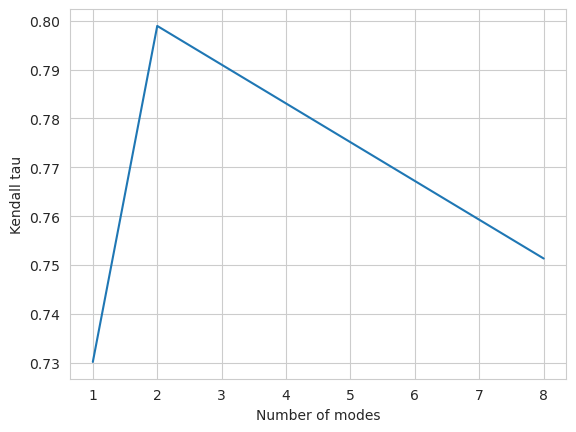

In [66]:

kt = []
df_downs = get_ranked_df(df)

for i,ff_layers in enumerate(df_downs[COLUMS_SPLIT].unique()):
    df_tmp = df_downs[df_downs[COLUMS_SPLIT] == ff_layers]
    kt.append(df_tmp[["global_meanrank_metric", "meanrank_information"]].corr("kendall").iloc[0,1])
plt.plot(df_downs[COLUMS_SPLIT].unique(),kt,)
plt.xlabel("Number of modes")
plt.ylabel("Kendall tau")